# Time series analysis on the data international Airline passengers from 1940 to 1960

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# load the data 
df = pd.read_csv("AirPassangers.csv")
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
# Rename the column
df.rename(columns={"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60":"Passengers"}, inplace=True)


In [6]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [8]:
df.shape

(145, 2)

Text(0, 0.5, 'Passengers')

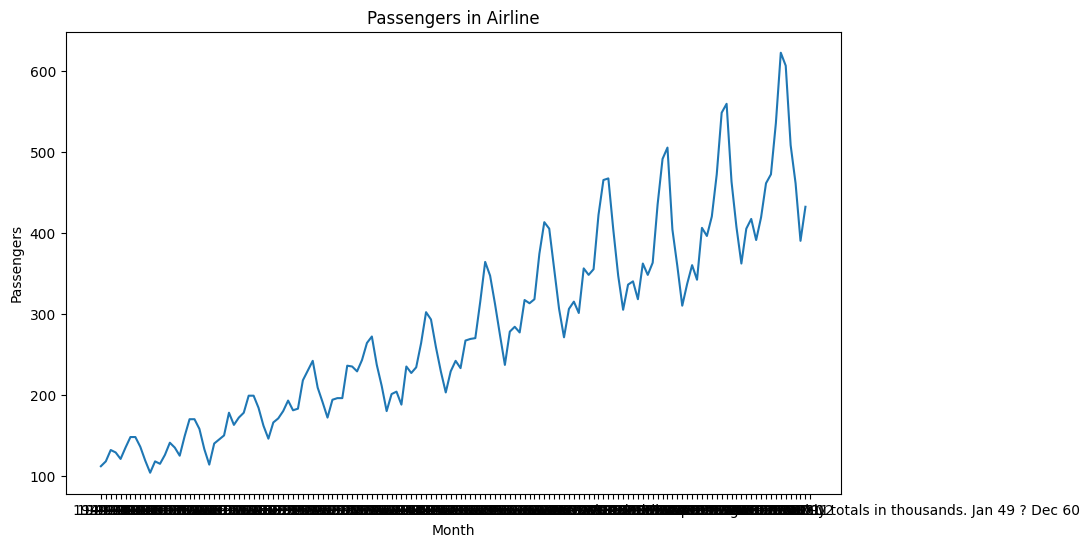

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df["Month"],df["Passengers"])
plt.title("Passengers in Airline")
plt.xlabel("Month")
plt.ylabel("Passengers")

<Axes: xlabel='Month', ylabel='Passengers'>

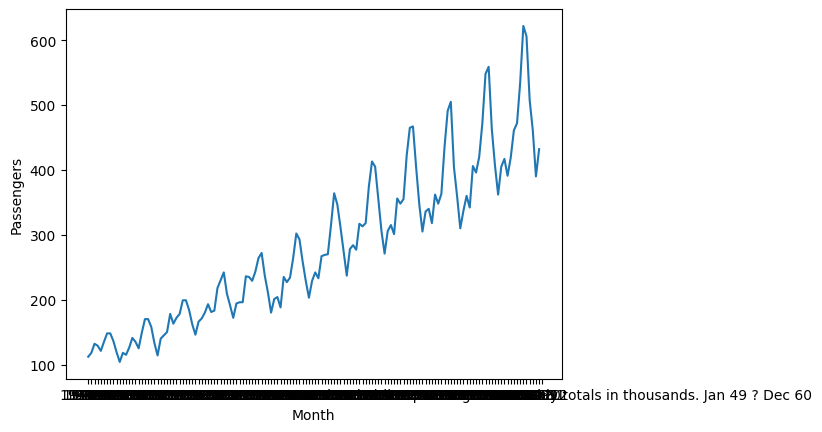

In [10]:
# Also plot on seaborn library 
sns.lineplot(data=df,x="Month",y="Passengers")

In [11]:
# decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
# Plot the decomposition
decompose.plot()


ValueError: This function does not handle missing values